# Importing data

In [5]:
import pandas as pd
data=pd.read_csv('dataset.csv',delimiter = ";")
data.head()

,CUB,PUZ,CAL,MEM,COM,VOC
0,5,5,4,0,1,1
1,4,3,3,2,2,1
2,2,1,2,3,2,2
3,5,3,5,3,4,3
4,4,4,3,2,3,2


# Visualization of the correlations between the different features

In [36]:
import numpy as np
data1 = data-np.mean(data,axis=0)
data1 = pd.DataFrame(data1)
data1.head()

,0,1,2,3,4,5
0,2.4,3.066667,1.8,-2.4,-1.0,-0.8
1,1.4,1.066667,0.8,-0.4,0.0,-0.8
2,-0.6,-0.933333,-0.2,0.6,0.0,0.2
3,2.4,1.066667,2.8,0.6,2.0,1.2
4,1.4,2.066667,0.8,-0.4,1.0,0.2


In [66]:
data1=data1.values

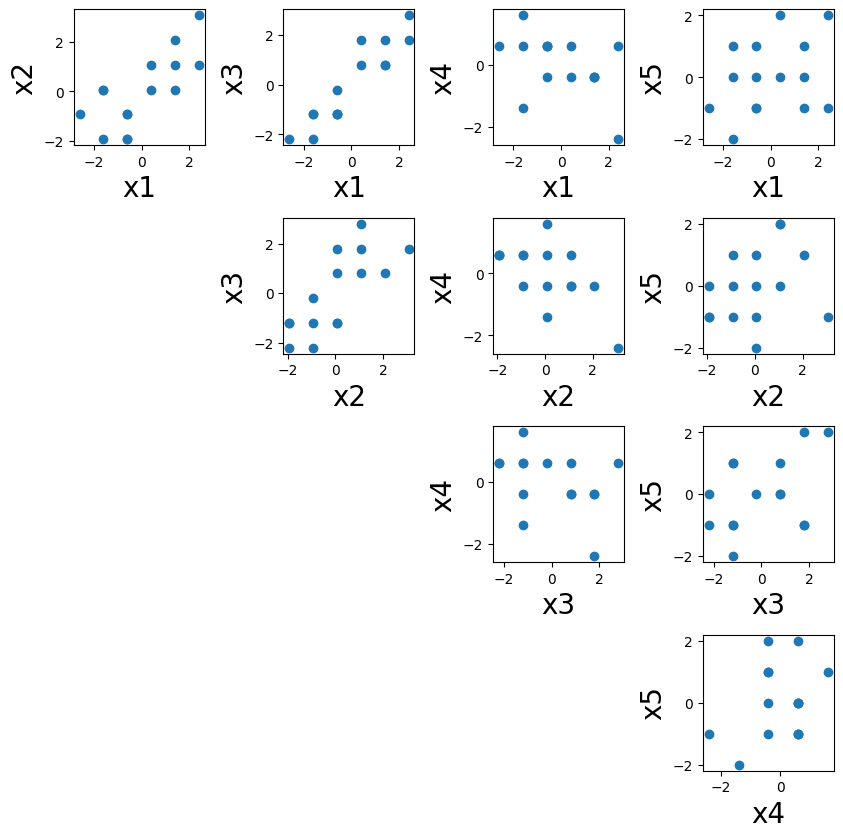

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    for j in range(5):
        if j > i:
            plt.subplot(5,5,i*5+j+1)
            plt.scatter(data[:,i], data1[:,j])
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

# Observations based on the figures :
 ### - X1 seems very correlated with X1 and X2 and not correlated with X4 but it might be somewhat correlated with X5
 ### - X2 seems very correlated with X3 and might be somewhat correlated with X4 and not correlated with X5 
 ### - X3 seems somewhat correlated with X5 and X4
 ### - X4 seems somewhat correlated with X5

# exercice:

## Determine the standardized data matrix Z:

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Z = scaler.fit_transform(data)
Z_toDataFrame=pd.DataFrame(Z)

In [40]:
Z_toDataFrame

,0,1,2,3,4,5
0,1.603567,2.135496,1.155493,-2.520504,-0.866025,-0.722315
1,0.935414,0.742781,0.513553,-0.420084,0.000000,-0.722315
2,-0.400892,-0.649934,-0.128388,0.630126,0.000000,0.180579
3,1.603567,0.742781,1.797434,0.630126,1.732051,1.083473
4,0.935414,1.439139,0.513553,-0.420084,0.866025,0.180579
5,-0.400892,-1.346291,-0.770329,0.630126,-0.866025,-0.722315
6,0.267261,0.742781,1.155493,-0.420084,1.732051,1.986367
7,-1.069045,0.046424,-0.770329,1.680336,0.866025,1.083473
8,-1.737198,-0.649934,-1.412270,0.630126,-0.866025,-1.625209
9,-0.400892,-1.346291,-0.770329,0.630126,-0.866025,-1.625209


## Deduce the correlation matrix RX:

In [41]:
import numpy as np
RX = np.corrcoef(Z, rowvar=False)
RX_df=pd.DataFrame(RX)

In [42]:
RX_df

,0,1,2,3,4,5
0,1.000000,0.732030,0.920737,-0.449089,0.308607,0.273483
1,0.732030,1.000000,0.750994,-0.614310,0.281430,0.285027
2,0.920737,0.750994,1.000000,-0.368548,0.407687,0.486868
3,-0.449089,-0.614310,-0.368548,1.000000,0.303170,0.202289
4,0.308607,0.281430,0.407687,0.303170,1.000000,0.781929
5,0.273483,0.285027,0.486868,0.202289,0.781929,1.000000


## Determine the spectrum of RX:

In [55]:
eigenvalues, eigenvectors = np.linalg.eig(RX)
print("the spectrum of RX : ",eigenvalues)

the spectrum of RX :  [3.25811921 1.83716258 0.44298514 0.04003833 0.16794194 0.2537528 ]


## Deduce the principle components matrix CX:

In [68]:
#set order of the eigenvalues
idx = eigenvalues.argsort()[::-1]
CX = eigenvectors[:, idx]
CX_toDataFrame = pd.DataFrame(CX)
CX_toDataFrame.head()

,0,1,2,3,4,5
0,-0.496929,-0.148884,0.536604,-0.025870,-0.269505,0.607988
1,-0.479310,-0.212697,-0.333710,-0.452211,0.630006,0.110711
2,-0.523969,-0.028804,0.373141,0.283268,0.115843,-0.701237
3,0.246505,0.579981,0.540882,-0.195308,0.514565,0.085909
4,-0.298167,0.562729,-0.172605,-0.542190,-0.483882,-0.191124


## Decide how many principle components we should retain: 

[0.54301987 0.30619376 0.07383086 0.00667305 0.02799032 0.04229213]


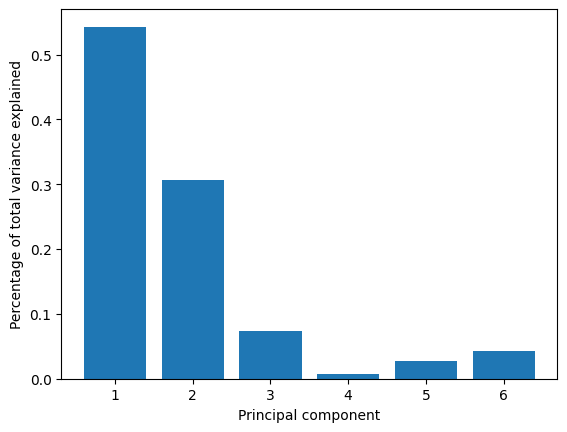

In [69]:
# Compute the percentage of total variance explained by each principal component
variance_explained = eigenvalues / eigenvalues.sum()
print(variance_explained)
# Create a bar plot to visualize the percentage of total variance explained by each principal component
import matplotlib.pyplot as plt
plt.bar(range(1, 7), variance_explained)
plt.xlabel('Principal component')
plt.ylabel('Percentage of total variance explained')
plt.show()

## --Proportion of the total variance explained by components-- 

In [71]:
# Calculate the cumulative proportion of variance explained
cum_prop_var = np.cumsum(variance_explained)

# Create a dataframe with the results
components = np.arange(1, len(eigenvalues) + 1)
results = pd.DataFrame({'Components': components,
                        'Eigenvalues': eigenvalues,
                        'Proportion': variance_explained,
                        'Cumulative Prop.': cum_prop_var})
results

,Components,Eigenvalues,Proportion,Cumulative Prop.
0,1,3.258119,0.543020,0.543020
1,2,1.837163,0.306194,0.849214
2,3,0.442985,0.073831,0.923044
3,4,0.040038,0.006673,0.929718
4,5,0.167942,0.027990,0.957708
5,6,0.253753,0.042292,1.000000


### based on the visualization of the percentage of total variance explained by each principal component , we can say that the first principle component explains over 54% of the total variance and the second explains over 30% of it . So together they explain more than 84% of the total variance which is pretty good since it reduces our dimensions from workign with 5 features to only 2 features. 
### Therefore, we could decide to retain the first two principal components.This would allow us to reduce the dimensionality of the data while still retaining most of the information